# GD

导入包，设置随机数种子以及预设值


In [1]:
from numpy.random import seed
from data_generator import *
from algo import GD
seed(777)

n = 50
m = 200  # 200 个数据
stop_gap = 0.01  # 停止条件
print_template = "在n={}时，采用{}方法在{}步后收敛，\n耗时{:.4f}s，拟合结果和真实结果的差值的二范数是{:.3f}。"

## 生成数据

In [2]:
A, x_gt, b = gen_data_all(m, n)

## 算法
初始化Gradient Descent控制器，随后测试回溯直线搜索和固定步长的 gradient descent 算法。

In [3]:
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")

### 回溯直线搜索

In [4]:
x_est = gd.run('backtracking')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))

在n=50时，采用backtracking方法在12步后收敛，
耗时0.0070s，拟合结果和真实结果的差值的二范数是1.097。


接下来绘制 objective value 的变化图：

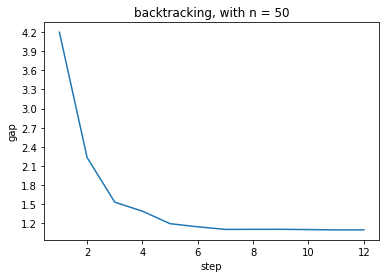

In [5]:
gd.draw_gaps()

### 固定步长的下降
做法类似，将学习率固定为 `0.001`。

In [6]:
x_est = gd.run("fixed")
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))

在n=50时，采用fixed方法在39步后收敛，
耗时0.0028s，拟合结果和真实结果的差值的二范数是1.122。


Objective value 的变化图：

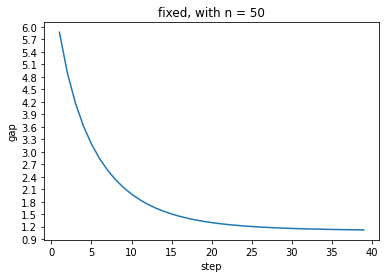

In [7]:
gd.draw_gaps()

## 伪逆法

In [8]:
x_est = gd.run("pi")
print(f"在n={gd.n}时，采用求伪逆方法在耗时{gd.stat_time:.4f}s，\n拟合结果和真实结果的差值的二范数是{gd.norm(x_gt, x_est):.3f}。")

在n=50时，采用求伪逆方法在耗时0.0046s，
拟合结果和真实结果的差值的二范数是1.097。


# SGD
首先在 `n=50` 的情况下implement SGD。

In [9]:
x_est = gd.run('sgd')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))

在n=50时，采用sgd方法在500步后收敛，
耗时0.1371s，拟合结果和真实结果的差值的二范数是1.456。


Objective value 的变化图：

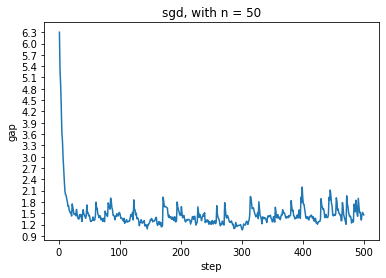

In [10]:
gd.draw_gaps()

## 不同规模下的sgd
### `n=200`

在n=200时，采用sgd方法在500步后收敛，
耗时1.3450s，拟合结果和真实结果的差值的二范数是7.193。


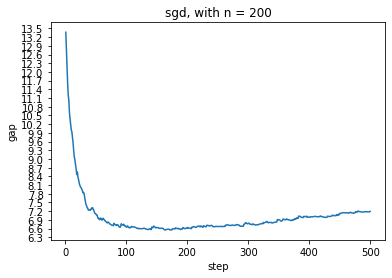

In [11]:
n = 200
A, x_gt, b = gen_data_all(m, n)
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")
x_est = gd.run('sgd')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### `n=300`

在n=300时，采用sgd方法在500步后收敛，
耗时2.8957s，拟合结果和真实结果的差值的二范数是12.027。


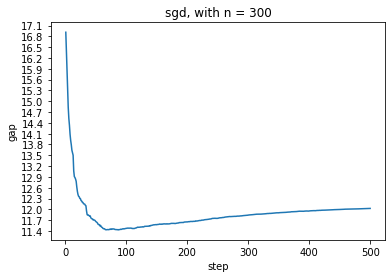

In [12]:
n = 300
A, x_gt, b = gen_data_all(m, n)
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")
x_est = gd.run('sgd')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### `n=500`

在n=500时，采用sgd方法在500步后收敛，
耗时4.9069s，拟合结果和真实结果的差值的二范数是17.052。


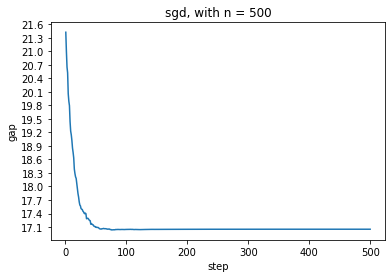

In [13]:
n = 500
A, x_gt, b = gen_data_all(m, n)
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")
x_est = gd.run('sgd')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### `n=1000`

在n=1000时，采用sgd方法在500步后收敛，
耗时15.0611s，拟合结果和真实结果的差值的二范数是30.523。


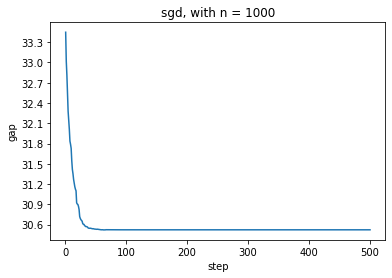

In [14]:
n = 1000
A, x_gt, b = gen_data_all(m, n)
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")
x_est = gd.run('sgd')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### `n=2000`

在n=2000时，采用sgd方法在500步后收敛，
耗时41.7983s，拟合结果和真实结果的差值的二范数是42.303。


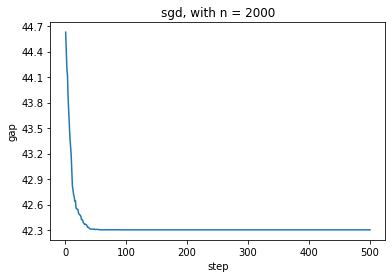

In [15]:
n = 2000
A, x_gt, b = gen_data_all(m, n)
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")
x_est = gd.run('sgd')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### 改变`n`对『过拟合』的影响
可以看到，在 `n=50` 时，训练时有不断的波动；在 `n=200`时，出现了严重的过拟合现象；在 `n=300`开始，过拟合现象逐渐减弱，直到`n=1000` 时基本消失。猜测为『过参数化』带来的影响？

## Starting point 对 sgd 的影响

为了研究 Starting point 对sgd收敛的影响，此处选用了三种初始化方式，分别为全零、全一、全为N(0,1)。为了节约训练时间，取`n=500`.
### 全零
初始化为全零。

在n=500时，采用sgd方法在500步后收敛，
耗时3.5286s，拟合结果和真实结果的差值的二范数是17.731。


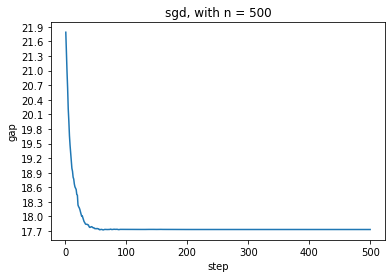

In [16]:
n = 500
A, x_gt, b = gen_data_all(m, n)
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")
x_est = gd.run('sgd', '0')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### 全一
初始化为全一。

在n=500时，采用sgd方法在500步后收敛，
耗时3.4500s，拟合结果和真实结果的差值的二范数是25.781。


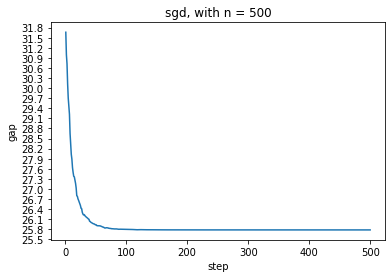

In [17]:
x_est = gd.run('sgd', '1')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### 正态分布
初始化为全N(0,1)。

在n=500时，采用sgd方法在500步后收敛，
耗时3.1012s，拟合结果和真实结果的差值的二范数是25.736。


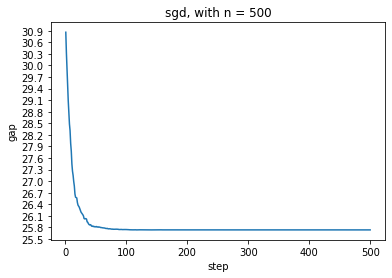

In [18]:
x_est = gd.run('sgd', 'norm')
print(print_template.format(gd.n, gd.train_mode, gd.stat_step_count, gd.stat_time, gd.norm(x_gt, x_est)))
gd.draw_gaps()

### 初始值对结果的影响
在经过如上的实验后，我们发现：在全一的时候效果最差，在正态分布的时候效果最好。
这是否具有代表性呢？笔者又尝试了几次（包括改变n的值为777或者1000），结果发现初值为全1的时候显著的差，全零和正态分布初始化时效果差不多。
笔者猜测原因是因为和全零和正太分布的情况下，均值和真实值较为接近；而全1情况下非常不接近。不知道是否有数学解释。
## 与伪逆法做比较
前文中伪逆法的效果十分的好，那么在这里的效果如何呢？我们还是选取 `n=2000`为例。

In [19]:
n = 2000
A, x_gt, b = gen_data_all(m, n)
gd = GD(n=n, m=m, A=A, b=b, x_gt=x_gt, stop_gap=stop_gap, train_mode="backtracking")
x_est = gd.run('pi')
print(f"采用伪逆法在耗时{gd.stat_time:.4f}s，拟合结果和真实结果的差值的二范数是{gd.norm(x_gt, x_est):.3f}。")

采用伪逆法在耗时0.5079s，拟合结果和真实结果的差值的二范数是2191845.984。


效果非常差。原因猜测是计算机在求大规模矩阵的逆的时候用了近似求解？或者是伪逆的数学性质？我没想明白。